# K-means Clustering of headlines

By [Leonardo Tozo](https://www.linkedin.com/in/leotozo/)

****************************
Hello,
<br>This is part of my personal portfolio, my intention with this series of notebooks is to keep practicing and improving my A.I & Machine Learning skills.
 
*Leonardo Tozo Bisinoto*
<br>*MBA in Artificial Intelligence & Machine Learning*
<br>*LinkedIn: https://www.linkedin.com/in/leotozo/*
<br>*Github: https://github.com/leotozo*
**************************** 

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [9]:
data = pd.read_csv("irishtimes-date-text.v1.csv",error_bad_lines=False,usecols =["headline_text"],encoding='utf-8')
data.head()

,headline_text
0,Smurfit's share price in retreat despite recor...
1,Jamont plans £5m investment to update plant
2,Management is blamed for most company failures
3,Forte expected to announce a special dividend ...
4,Accountancy firm adopts name change


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422230 entries, 0 to 1422229
Data columns (total 1 columns):
headline_text    1422222 non-null object
dtypes: object(1)
memory usage: 10.9+ MB


# Deleting dupliate headlines(if any)

In [11]:
data[data['headline_text'].duplicated(keep=False)].sort_values('headline_text').head(8)

,headline_text
611218,$22.4m record for Rothko canvas
603933,$22.4m record for Rothko canvas
901876,$3.7m for rare US coin featured in 'Hawaii Fiv...
901791,$3.7m for rare US coin featured in 'Hawaii Fiv...
908861,$8bn rail project unveiled for seven states
908942,$8bn rail project unveiled for seven states
245624,'A Clockwork Orange'
245393,'A Clockwork Orange'


In [12]:
data = data.drop_duplicates('headline_text')

# NLP

In [14]:
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
desc = data['headline_text'].values.astype('U')
vectorizer = TfidfVectorizer(stop_words = stop_words)
X = vectorizer.fit_transform(desc)

In [15]:
word_features = vectorizer.get_feature_names()
print(len(word_features))
print(word_features[5000:5100])

105760
['aguna', 'agung', 'aguri', 'agus', 'agusta', 'agustín', 'agut', 'agyness', 'agóid', 'agüero', 'ah', 'ahab', 'ahamed', 'ahane', 'aharon', 'ahascragh', 'ahcs', 'ahdaf', 'ahead', 'aheand', 'ahearn', 'ahearne', 'ahem', 'aherlow', 'ahern', 'aherne', 'ahernism', 'aherns', 'aherton', 'ahh', 'ahk', 'ahki', 'ahl', 'ahlan', 'ahlberg', 'ahli', 'ahlstrom', 'ahmad', 'ahmadinejad', 'ahmadiyya', 'ahmed', 'ahmet', 'ahn', 'ahokas', 'ahold', 'ahonoora', 'ahoy', 'ahp', 'ahr', 'ahrendts', 'ahtisaari', 'ahtissari', 'ahunting', 'ai', 'aia', 'aib', 'aiba', 'aibha', 'aibheil', 'aibhleise', 'aibhléis', 'aibim', 'aibitír', 'aibo', 'aibof', 'aibp', 'aicraft', 'aid', 'aida', 'aidan', 'aide', 'aided', 'aideed', 'aideen', 'aiden', 'aideninho', 'aider', 'aiders', 'aides', 'aidhe', 'aidid', 'aidine', 'aiding', 'aidlink', 'aids', 'aidsday', 'aidy', 'aifca', 'aife', 'aifreann', 'aifric', 'aiféala', 'aig', 'aige', 'aighneachtaí', 'aighneas', 'aighnis', 'aigle', 'aigles', 'aigne']


# Stemming

# Tokenizing

In [16]:
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

# Vectorization with stop words(words irrelevant to the model), stemming and tokenizing

In [17]:
vectorizer2 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize)
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))
print(word_features2[:50])

C:\Users\LEONARDOTOZOBISINOTO\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


73263
["''", "'a", "'b", "'c", "'d", "'e", "'f", "'g", "'i", "'it", "'j", "'k", "'l", "'m", "'mi", "'n", "'o", "'p", "'q", "'r", "'refuge", "'s", "'t", "'u", "'w", "'x", "'y", "'z", "a'", "a'chang", "a'matt", "a'triumph", "a'wand", 'aa', 'aaa', 'aaaagh', 'aaaggghhh', 'aaah', 'aaahh', 'aaaw', 'aach', 'aachen', 'aah', 'aahhh', 'aai', 'aaiu', 'aaland', 'aalborg', 'aalto', 'aanholt']


In [18]:
vectorizer3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
X3 = vectorizer3.fit_transform(desc)
words = vectorizer3.get_feature_names()

C:\Users\LEONARDOTOZOBISINOTO\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:301: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


# K-means clustering

# Elbow method to select number of clusters

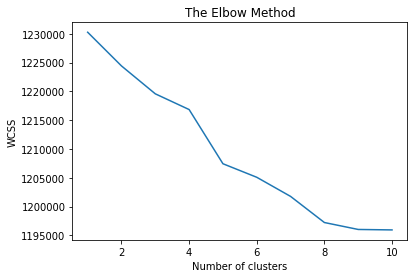

In [19]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
#plt.savefig('elbow.png')
plt.show()

https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/0U9Z9F



As more than one elbows have been generated, I will have to select right amount of clusters by trial and error. So, I will showcase the results of different amount of clusters to find out the right amount of clusters.


In [20]:
print(words[250:300])

['despit', 'develop', 'diari', 'did', 'die', 'differ', 'direct', 'director', 'disabl', 'discuss', 'dismiss', 'disput', 'doctor', 'doe', 'dog', "don't", 'doneg', 'doubl', 'doubt', 'draw', 'dream', 'drink', 'drive', 'driver', 'drop', 'drug', 'dublin', 'dunn', 'dure', 'dutch', 'e', 'earli', 'earn', 'eas', 'east', 'ecb', 'econom', 'economi', 'edg', 'educ', 'effect', 'effort', 'eircom', 'elect', 'electr', 'emerg', 'employ', 'end', 'energi', 'england']


# 3 Clusters

In [21]:
kmeans = KMeans(n_clusters = 3, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X3)
# We look at 3 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : new, say, m, ireland, dublin, plan, year, man, deal, eu, bank, job, report, profit, hous, pay, set, firm, tax, fund, home, old, face, group, cut
1 : man, kill, win, make, court, time, set, report, warn, die, claim, rise, home, talk, charg, face, attack, eu, case, death, day, bank, deal, cut, rule
2 : irish, time, new, m, firm, eu, bank, say, life, water, win, year, market, open, anglo, london, award, team, uk, make, world, sale, set, lead, profit


# 5 Clusters

In [22]:
kmeans = KMeans(n_clusters = 5, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 5 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : new, man, ireland, dublin, plan, year, murder, charg, jail, die, kill, job, court, old, death, held, eu, arrest, hous, car, attack, set, face, york, bank
1 : m, profit, invest, pay, fund, loss, firm, cost, rais, site, deal, sale, sell, plan, irish, year, dublin, worth, buy, offic, bank, make, centr, hous, tax
2 : irish, time, new, eu, bank, firm, life, water, win, open, market, year, award, london, team, anglo, world, make, set, uk, lead, hope, sale, day, british
3 : kill, win, make, time, court, set, report, warn, rise, claim, talk, home, eu, face, day, case, bank, attack, deal, die, death, cut, rule, end, seek
4 : say, report, minist, eu, need, ireland, ahern, plan, irish, bank, chief, govern, deal, state, taoiseach, new, kenni, garda, group, expert, cut, kill, judg, iraq, talk


# 6 Clusters

In [23]:
kmeans = KMeans(n_clusters = 6, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# We look at 6 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : irish, man, murder, charg, die, jail, kill, court, year, held, time, death, dublin, arrest, assault, attack, stab, crash, m, life, shot, rape, guilti, car, shoot
1 : say, report, minist, need, eu, ahern, irish, plan, govern, deal, state, chief, bank, taoiseach, garda, new, group, cut, kenni, expert, kill, year, judg, iraq, talk
2 : ireland, northern, bank, say, eu, new, world, win, final, squad, face, cup, best, year, brexit, m, tax, make, need, rate, set, return, team, place, job
3 : new, york, plan, year, irish, deal, job, dublin, set, old, open, rule, home, law, face, appoint, chief, m, creat, car, eu, look, sign, unveil, servic
4 : report, seek, m, profit, rise, garda, loss, help, irish, abus, group, eu, bank, gardai, inquiri, case, increas, death, talk, fund, publish, court, dublin, state, sale
5 : m, dublin, plan, year, kill, win, make, time, court, set, warn, home, rise, claim, eu, face, talk, day, deal, bank, case, attack, cut, hous, die


# 8 Clusters

In [24]:
kmeans = KMeans(n_clusters = 8, n_init = 20, n_jobs = 1)
kmeans.fit(X3)
# Finally, we look at 8 the clusters generated by k-means.
common_words = kmeans.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : kill, crash, bomb, man, attack, car, soldier, iraq, suicid, road, isra, woman, blast, peopl, pakistan, rebel, palestinian, afghan, accid, polic, bus, troop, say, iraqi, explos
1 : irish, time, new, m, firm, eu, bank, say, life, water, win, market, year, anglo, award, london, team, uk, make, sale, world, profit, set, lead, rise
2 : say, m, man, dublin, plan, year, make, win, court, time, report, set, rise, eu, die, claim, warn, face, charg, bank, talk, case, death, deal, cut
3 : end, strike, year, talk, action, late, day, air, worker, say, staff, union, hope, deal, run, season, plan, vote, disput, bus, dublin, come, week, note, threat
4 : home, nurs, famili, new, m, return, bring, dublin, holiday, care, come, irish, man, plan, make, attack, sale, woman, help, ireland, say, hous, mother, leav, near
5 : open, new, irish, centr, dublin, win, lead, day, store, m, ireland, offic, talk, british, french, trial, option, final, cork, mcilroy, inquiri, round, world, market, season
6 : new, yo